---
# Section 2.2: Condition Numbers

---

Let $A$ be a nonsingular matrix, and suppose we solve 

$$Ax = b.$$ 

Due to errors in the data and in the computation using finite precision, we get a solution $\hat{x}$ that satisfies 

$$A \hat{x} = b + \delta b.$$

---

## Exercise 1: (Desmos Input 1)

1. Let

   $$
A = 
\left[
\begin{array}{cc}
5 & 1 \\
0 & 1 \\
\end{array}
\right],
\qquad
b = 
\left[
\begin{array}{c}
7 \\
2 \\
\end{array}
\right],
\qquad
\delta b = 
\left[
\begin{array}{c}
-1.0 \\
0.25 \\
\end{array}
\right].
$$

   Solve $Ax = b$ and $A\hat{x} = b + \delta b$. Compute $\|\delta b\|$ and $\|x - \hat x\|$.
   
2. Let

   $$
A = 
\left[
\begin{array}{cc}
0.1 & 1 \\
0 & 1 \\
\end{array}
\right],
\qquad
b = 
\left[
\begin{array}{c}
2.1 \\
2 \\
\end{array}
\right],
\qquad
\delta b = 
\left[
\begin{array}{c}
-0.25 \\
0.25 \\
\end{array}
\right].
$$

   Solve $Ax = b$ and $A\hat{x} = b + \delta b$. Compute $\|\delta b\|$ and $\|x - \hat x\|$.
   
3. Does small $\|\delta b\|$ imply small $\|x - \hat x\|$?

In [34]:
using LinearAlgebra

---

## Exercise 2: (Desmos Input 2)

Run the following code. What do you observe? Why is this happening?

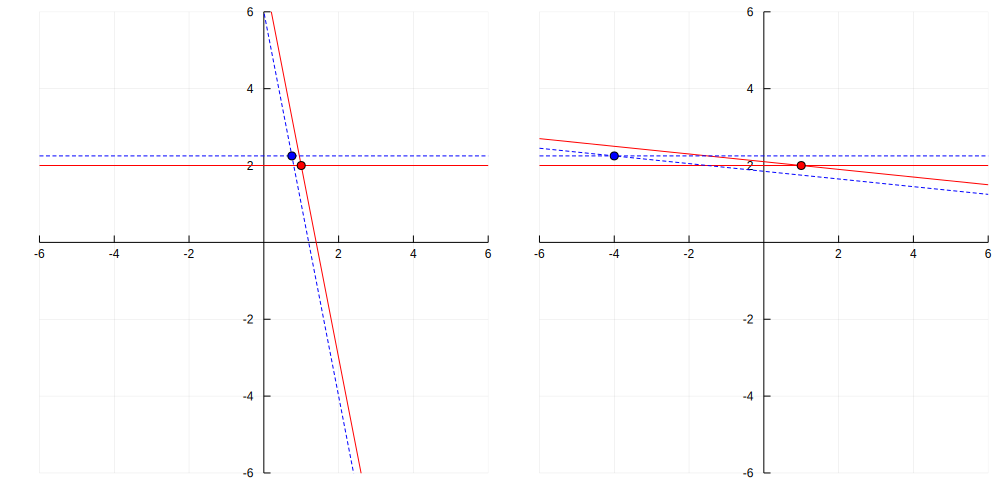

In [76]:
using Plots

function ploteqns!(plt, A, x, b; color=:red, style=:solid)
    # Plot A*x = b equations and solution
    for i = 1:2
        plot!(plt, x -> (b[i] - A[i,1]*x)/A[i,2], -6, 6, c=color, s=style)
    end
    plot!(plt, [x[1]], [x[2]], markershape=:circle, markersize=4, c=color)
end

function myplot(A, b, δb; limits=(-6,6), pltsize=(600,600))
    xtrue = A\b
    bhat = b + δb
    xhat = A\bhat
    plt = plot(xlim=limits, ylim=limits, size=pltsize, framestyle=:origin, legend=false)
    ploteqns!(plt, A, xtrue, b)
    ploteqns!(plt, A, xhat, bhat; color=:blue, style=:dash)
end

A = [5 1; 0 1.0]
b = [7, 2.0]
δb = [-1, .25]
plt1 = myplot(A, b, δb)

A = [0.1 1; 0 1]
b = [2.1, 2]
δb = [-.25, .25]
plt2 = myplot(A, b, δb)

plot(plt1, plt2, size=(1000, 500))

---

For the matrix 

$$
A = 
\left[
\begin{array}{cc}
5 & 1 \\
0 & 1 \\
\end{array}
\right],
$$

a small $\delta b$ resulted in $\hat{x} \approx x$.  That is,

$$
\lVert \delta b \rVert \text{ small} \quad \implies \quad \lVert \delta x \rVert = \lVert \hat{x} - x \rVert \text{ small}.
$$

When this happens, we say that the matrix $A$ is **well-conditioned**.

For the matrix 

$$
A = 
\left[
\begin{array}{cc}
0.1 & 1 \\
0 & 1 \\
\end{array}
\right],
$$

even though $\lVert \delta b \rVert$ was small, we got a large error $\lVert \delta x \rVert = \lVert \hat{x} - x \rVert$.

When this happens, we say that the matrix $A$ is **ill-conditioned**.

---

## The condition number of $A$

We want to estimate the **relative error** in computing $x$,

$$
\frac{\lVert \delta x \rVert}{\lVert x \rVert},
$$

in terms of the **relative error** in $b$,

$$
\frac{\lVert \delta b \rVert}{\lVert b \rVert},
$$

where

$$
Ax = b \qquad \text{and} \qquad A(x + \delta x) = b + \delta b.
$$

The **condition number** of $A$ is

$$
\kappa(A) = \lVert A \rVert \lVert A^{-1} \rVert.
$$

> ### Theorem: (Relative error bound)
> 
> Let $A$ be nonsingular, $b \neq 0$, and $Ax = b$. If 
>
> $$A(x + \delta x) = b + \delta b,$$
>
> then
>
> $$
\frac{\lVert \delta x \rVert}{\lVert x \rVert}
\leq \kappa(A) \frac{\lVert \delta b \rVert}{\lVert b \rVert}.
$$


If $\kappa(A)$ is **small**, then

$$
\frac{\lVert \delta b \rVert}{\lVert b \rVert} \text{ small} \quad \implies \quad \frac{\lVert \delta x \rVert}{\lVert x \rVert} \text{ small},
$$

so $A$ is **well-conditioned**.


If $\kappa(A)$ is **large**, then it is possible to have 

$$
\frac{\lVert \delta b \rVert}{\lVert b \rVert} \text{ small} \quad \text{and} \quad \frac{\lVert \delta x \rVert}{\lVert x \rVert} \text{ large},
$$

so $A$ is **badly conditioned**.

---

## `cond`

In [2]:
?cond

search: cond Conda condskeel Condition contour3D contourf3D macroexpand



```
cond(M, [p])
```

Condition number of the matrix `M`, computed using the operator `p`-norm. Valid values for `p` are `1`, `2` (default), or `Inf`.


In [3]:
# The well-conditioned A
A = [5 1; 0 1]
cond(A)

5.20798724079689

In [4]:
norm(A)*norm(inv(A))

5.20798724079689

In [5]:
# The ill-conditioned A
A = [.1 1; 0 1]
cond(A)

20.050124999218763

---

## An extreme example

$$
A = 
\begin{bmatrix}
1000 & 999 \\
999 & 998 \\
\end{bmatrix},
\qquad
A^{-1} = 
\begin{bmatrix}
-998 & 999 \\
999 & -1000 \\
\end{bmatrix}
$$

In [6]:
A = [1000 999; 999 998]

2x2 Array{Int64,2}:
 1000  999
  999  998

In [7]:
det(A)

-0.9999999999763531

In [8]:
cond(A)

3.9920059997083056e6

Thus,

$$
\kappa(A) \approx 4 \times 10^6.
$$

This is a very ill-conditioned matrix.

In [9]:
x = [1; 1]
b = A*x

2-element Array{Int64,1}:
 1999
 1997

In [10]:
δb = [-1; 1]
xhat = A\(b + δb)

2-element Array{Float64,1}:
  1998.0
 -1998.0

In [11]:
δx = xhat - x

2-element Array{Float64,1}:
  1997.0
 -1999.0

In [12]:
norm(δb)/norm(b)

0.0005005004378126367

In [13]:
norm(δx)/norm(x)

1998.0002502975044

So we see that the relative error in $b$ is very small, but the relative error in $x$ is very large.

**Note**:

The worst-case scenario is always possible. We just choose $x$ such that

$$
\frac{\lVert Ax \rVert}{\lVert x \rVert} = 
\max_{y \neq 0} \frac{\lVert Ay \rVert}{\lVert y \rVert} = \lVert A \rVert,
$$

and choose $\delta b$ such that

$$
\frac{\lVert A^{-1}\delta b \rVert}{\lVert \delta b \rVert} = 
\max_{y \neq 0} \frac{\lVert A^{-1}y \rVert}{\lVert y \rVert} = \lVert A^{-1} \rVert.
$$

Then let $b = Ax$ and $\delta x = A^{-1} \delta b$, and we obtain

$$
\frac{\lVert \delta x \rVert}{\lVert x \rVert}
= \kappa(A) \frac{\lVert \delta b \rVert}{\lVert b \rVert}.
$$


---